In [56]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import animation

In [57]:
def wave(x, y, t):
    center_x = .5
    center_y = .5
    kx1 = 40  # 1/m
    kx2 = 80  # 1/m
    kx3 = 90  # 1/m
    kx4 = 100  # 1/m
    ky1 = 40  # 1/m
    ky2 = 80  # 1/m
    ky3 = 70  # 1/m
    ky4 = 79  # 1/m
    f1 = 50  # Hz
    f2 = 70  # Hz
    f3 = 55  # Hz
    f4 = 100  # Hz
    assert sft > 2 * max(f1, f2, f3, f4), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    assert sfx > 2 * max(kx1, kx2, kx3,
                         kx4), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    assert sfy > 2 * max(ky1, ky2, ky3,
                         ky4), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    w = np.sin(
        np.sqrt((2 * np.pi * kx1 * (x - center_x)) ** 2 + (2 * np.pi * ky1 * (y - center_y)) ** 2) + 2 * np.pi * f1 * t)
    w += np.sin(
        np.sqrt((2 * np.pi * kx2 * (x - center_x)) ** 2 + (2 * np.pi * ky2 * (y - center_y)) ** 2) + 2 * np.pi * f2 * t)
    w += np.sin(
        np.sqrt((2 * np.pi * kx3 * (x - center_x)) ** 2 + (2 * np.pi * ky3 * (y - center_y)) ** 2) + 2 * np.pi * f3 * t)
    w += np.sin(
        np.sqrt((2 * np.pi * kx4 * (x - center_x)) ** 2 + (2 * np.pi * ky4 * (y - center_y)) ** 2) + 2 * np.pi * f4 * t)
    return w / 4


def pulse(x, y, t):
    """
    y=exp(-(sqrt(x^2+y^2)-t)^2)*(sin(sqrt(x^2+y^2)-t)+cos(sqrt(x^2+y^2)-t))
    """
    center_x = 0
    center_y = .5
    f1 = 30  # Hz
    f2 = 50  # Hz
    f3 = 80  # Hz
    kx1 = 20  # 1/m
    kx2 = 40  # 1/m
    kx3 = 60  # 1/m
    ky1 = 20  # 1/m
    ky2 = 40  # 1/m
    ky3 = 60  # 1/m
    assert sft > 2 * max(f1, f2, f3), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    assert sfx > 2 * max(kx1, kx2, kx3), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    assert sfy > 2 * max(ky1, ky2, ky3), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    p = np.exp(
        - (np.sqrt((2 * np.pi * kx1 * (x - center_x)) ** 2 + (2 * np.pi * ky1 * (y - center_y)) ** 2)
           - 2 * np.pi * f1 * t) ** 2)
    p *= (np.sin(np.sqrt((2 * np.pi * kx2 * (x - center_x)) ** 2 + (
                2 * np.pi * ky2 * (y - center_y)) ** 2) - 2 * np.pi * f2 * t) + np.cos(np.sqrt(
        (2 * np.pi * kx3 * (x - center_x)) ** 2 + (2 * np.pi * ky3 * (y - center_y)) ** 2) - 2 * np.pi * f3 * t)) / 2
    return p

In [58]:
sp = 256  # sampling points in 1d
t_max = 1
x_max = 1
y_max = 1
dt = t_max / sp  # sampling interval
dx = x_max / sp  # sampling interval
dy = y_max / sp  # sampling interval
sft = sp / t_max  # sampling frequency t
sfx = sp / x_max  # sampling spatial frequency x
sfy = sp / y_max  # sampling spatial frequency y

print('sampling frequency t', sft)
print('sampling frequency x', sfx)
print('sampling frequency y', sfy)

T = np.arange(0, t_max, dt)
X = np.arange(0, x_max, dx)
Y = np.arange(0, y_max, dy)
x, y = np.meshgrid(X, Y, indexing='ij')

z = np.zeros((len(X), len(Y), len(T)))
for i, t in enumerate(T):
    z[:, :, i] = pulse(x, y, t)

print('z.shape', z.shape)

sampling frequency t 256.0
sampling frequency x 256.0
sampling frequency y 256.0
z.shape (256, 256, 256)


In [59]:
fps = 256
# fps = 10
print('fps', fps)

fps 256


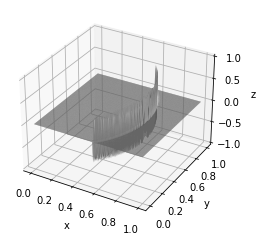

In [66]:
def change_plot(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, z_array[:, :, frame_number], cmap="viridis")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surface = [ax.plot_surface(x, y, z[:, :, 128], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-1, 1)
ani = animation.FuncAnimation(fig, change_plot, len(T), fargs=(z, surface), interval=1000 / fps)
plt.show()

In [67]:
# HTML(ani.to_jshtml())

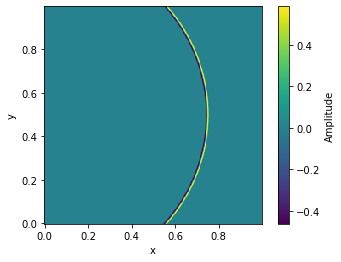

In [68]:
plt.close()


def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax2.pcolormesh(x, y, z_array[:, :, frame_number], cmap='viridis')


fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
image = [ax2.pcolormesh(x, y, z[:, :, 128], cmap='viridis')]
ax2.set_aspect(x_max / y_max)
plt.colorbar(image[0], label='Amplitude')
ani2 = animation.FuncAnimation(fig2, change_plot_img, len(T), fargs=(z, image), interval=1000 / fps)
plt.show()

In [69]:
# HTML(ani2.to_jshtml())

In [70]:
KX = np.arange(-sfx / 2, sfx / 2, sfx / sp)
KY = np.arange(-sfy / 2, sfy / 2, sfy / sp)
FREQ = np.arange(0, sft, sft / sp)

In [71]:
fft_result = np.fft.fftn(z)

In [72]:
real_fft = fft_result.real
imag_fft = fft_result.imag

In [73]:
abs_real_fft = np.abs(real_fft)
abs_imag_fft = np.abs(imag_fft)
abs_fft = np.abs(fft_result)

In [74]:
shifted_fft = np.fft.fftshift(abs_fft, axes=(0, 1))

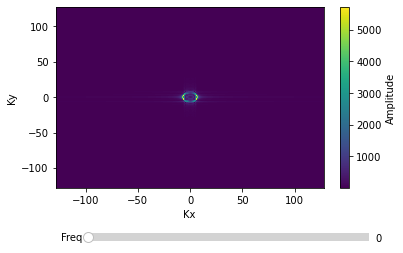

In [75]:
plt.close()
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.set_xlabel('Kx')
ax3.set_ylabel('Ky')
Kx, Ky = np.meshgrid(KX, KY, indexing='ij')
image_fft = ax3.pcolormesh(Kx, Ky, shifted_fft[:, :, 0], cmap='viridis')
# plt.xlim(-sfx / 2, sfx / 2)
# plt.ylim(-sfy / 2, sfy / 2)
# ax3.set_aspect(x / y)
fig3.colorbar(image_fft, label='Amplitude')
fig3.subplots_adjust(bottom=0.25)
ax_freq = plt.axes([0.20, 0.05, 0.65, 0.06])
freq_slider = Slider(
    ax=ax_freq,
    label='Freq',
    valmin=0,
    valmax=sft / 2,
    valinit=0,
    valstep=1 / t_max,
)


def f_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * t_max - 1)


def update(val):
    ax3.pcolormesh(Kx, Ky, shifted_fft[:, :, f_val_to_idx(val)], cmap='viridis')
    fig3.canvas.draw_idle()


freq_slider.on_changed(update)
plt.show()

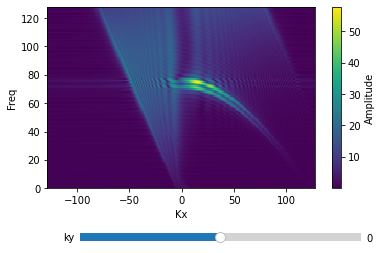

In [76]:
def kx_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * x_max - 1)


plt.close()
fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.set_xlabel('Kx')
ax4.set_ylabel('Freq')
Kx, Freq = np.meshgrid(KX, FREQ, indexing='ij')
image_fft_ky = ax4.pcolormesh(Kx, Freq, shifted_fft[:, kx_val_to_idx(0), :], cmap='viridis')
plt.ylim(0, sft / 2)  # set valid frequency window
# ax4.set_aspect(x / y)
fig4.colorbar(image_fft_ky, label='Amplitude')
fig4.subplots_adjust(bottom=0.25)
ax_ky = plt.axes([0.20, 0.05, 0.65, 0.06])
ky_slider = Slider(
    ax=ax_ky,
    label='ky',
    valmin=-sfy / 2,
    valmax=sfy / 2,
    valinit=0,
    valstep=1 / y_max,
)


def update_ky(val):
    ax4.pcolormesh(Kx, Freq, shifted_fft[:, kx_val_to_idx(val), :], cmap='viridis')
    fig4.canvas.draw_idle()


ky_slider.on_changed(update_ky)
plt.show()

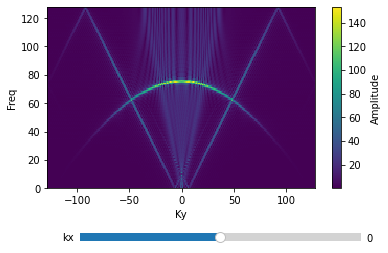

In [77]:
def kyx_val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * y_max - 1)


plt.close()
fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.set_xlabel('Ky')
ax5.set_ylabel('Freq')
Ky, Freq = np.meshgrid(KY, FREQ, indexing='ij')
image_fft_kx = ax5.pcolormesh(Ky, Freq, shifted_fft[kyx_val_to_idx(0), :, :], cmap='viridis')
plt.ylim(0, sft / 2)  # set valid frequency window
# ax5.set_aspect(x / y)
plt.colorbar(image_fft_kx, label='Amplitude')
plt.subplots_adjust(bottom=0.25)
ax_kx = plt.axes([0.20, 0.05, 0.65, 0.06])
kx_slider = Slider(
    ax=ax_kx,
    label='kx',
    valmin=-sfy / 2,
    valmax=sfy / 2,
    valinit=0,
    valstep=1 / x_max,
)


def update_kx(val):
    ax5.pcolormesh(Ky, Freq, shifted_fft[kyx_val_to_idx(val), :, :], cmap='viridis')
    fig5.canvas.draw_idle()


kx_slider.on_changed(update_kx)
plt.show()

In [78]:
ifft_result = np.fft.ifftn(fft_result).real
ifft_result

array([[[-1.54498810e-17,  2.56820390e-18, -3.78454321e-18, ...,
          5.22761769e-18, -1.71728088e-17,  1.25761364e-17],
        [ 2.16840434e-18,  6.86520204e-18, -1.78014562e-17, ...,
         -9.07289030e-18, -9.41755427e-18,  6.45756352e-18],
        [ 6.15390612e-18, -9.86623977e-18, -2.49874719e-19, ...,
         -1.62916798e-17,  6.73881541e-18, -1.80622858e-18],
        ...,
        [ 6.66614929e-18,  1.69406589e-19,  3.04660810e-17, ...,
          3.73529937e-18,  9.49265162e-18, -1.99275890e-18],
        [-7.35753994e-18, -8.13151629e-18,  1.13637940e-17, ...,
         -1.15933092e-17,  8.93072434e-18, -5.81785758e-18],
        [ 2.27682456e-18,  1.07251312e-17, -1.33814265e-17, ...,
         -5.27636269e-18, -4.23357488e-18,  7.19690608e-18]],

       [[-1.30192176e-17,  9.16903511e-18,  4.96616443e-18, ...,
         -5.34970289e-18, -1.41977448e-17,  4.38511078e-18],
        [-1.74105973e-17, -6.31178269e-18,  8.60433525e-18, ...,
          1.79757085e-17, -6.64256978e

C:\Users\parad1se\anaconda3\envs\waves\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


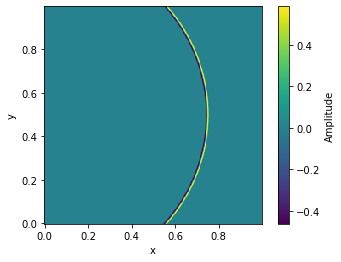

In [81]:
plt.close()


def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax6.pcolormesh(x, y, z_array[:, :, frame_number], cmap='viridis')


fig6 = plt.figure()
ax6 = fig6.add_subplot()
ax6.set_xlabel('x')
ax6.set_ylabel('y')
image = [ax6.pcolormesh(x, y, ifft_result[:, :, 128], cmap='viridis')]
ax6.set_aspect(x_max / y_max)
plt.colorbar(image[0], label='Amplitude')
ani3 = animation.FuncAnimation(fig6, change_plot_img, len(T), fargs=(ifft_result, image), interval=1000 / fps)
plt.show()